In [1]:
# Imports of necessary libraries
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('AirbnbIstanbul.csv')

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356


In [4]:
# Get information about the columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16160 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16244 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16251 non-null  object 
 6   latitude                        16251 non-null  float64
 7   longitude                       16251 non-null  float64
 8   room_type                       16251 non-null  object 
 9   price                           16251 non-null  int64  
 10  minimum_nights                  16251 non-null  int64  
 11  number_of_reviews               16251 non-null  int64  
 12  last_review                     

In [5]:
# Checking how many null values each attribute has

df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               16251
last_review                        8484
reviews_per_month                  8484
name                                 91
host_name                             7
id                                    0
host_id                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Dropping unusable columns

del df["neighbourhood_group"];
del df["last_review"];

In [7]:
# Dropping rows that have null in name and host_name attributes

df.dropna(subset=["name", "host_name"], inplace=True)

In [8]:
# Filling reviews with that are NaN with 0

df["reviews_per_month"].fillna(0, inplace=True)

In [9]:
# Checking how many duplicated rows we have (rows that have every attribute of the same value)

df.duplicated().sum()

0

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356


In [11]:
# Rechecking the data after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16155 entries, 0 to 16250
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16155 non-null  int64  
 1   name                            16155 non-null  object 
 2   host_id                         16155 non-null  int64  
 3   host_name                       16155 non-null  object 
 4   neighbourhood                   16155 non-null  object 
 5   latitude                        16155 non-null  float64
 6   longitude                       16155 non-null  float64
 7   room_type                       16155 non-null  object 
 8   price                           16155 non-null  int64  
 9   minimum_nights                  16155 non-null  int64  
 10  number_of_reviews               16155 non-null  int64  
 11  reviews_per_month               16155 non-null  float64
 12  calculated_host_listings_count  

In [12]:
# Analytical information about the price

df['price'].describe()

count    16155.000000
mean       355.289941
std       1433.062707
min          0.000000
25%        105.000000
50%        185.000000
75%        327.000000
max      59561.000000
Name: price, dtype: float64

In [13]:
# Taking a look at the records that have price 0

free_accommodations = df[df.price==0]
free_accommodations.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7770,20721123,Stunning Loft Apt. in the Heart of Old City,76368690,İlkan,Beyoglu,41.03073,28.97332,Entire home/apt,0,15,1,0.06,10,338
7903,21067497,Economic Flat Central&History Istanbul/Taksim,67359125,Eminönü,Beyoglu,41.03455,28.97219,Entire home/apt,0,2,65,3.96,7,310
7942,21172230,Economic Apartment Taksim Central&History/ista...,67359125,Eminönü,Beyoglu,41.03534,28.97225,Entire home/apt,0,2,46,2.80,7,302


In [14]:
# Removing records that have price 0 because that is impossible and thus making our analytical information incorrect

df.drop(df.price[df.price<=0].index,axis=0,inplace=True)
df['price'].describe()

count    16152.000000
mean       355.355931
std       1433.187613
min         16.000000
25%        105.000000
50%        187.500000
75%        327.000000
max      59561.000000
Name: price, dtype: float64

In [15]:
df[df.price>10000].sort_values(by="price", ascending=False).head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
15693,31974054,Elegance Single Room - Avicenna Hotel,166950259,Avicenna,Fatih,41.00445,28.97907,Private room,59561,1,0,0.00,4,363
13900,30361470,3 Rooms 1 Living Room Dublex - Grand Holiday I...,227944870,Ilhan,Kucukcekmece,41.03841,28.79471,Private room,59561,1,0,0.00,3,331
13899,30361326,3 Rooms 1 Living Room - Grand Holiday Istanbul,227944870,Ilhan,Kucukcekmece,41.03740,28.79435,Private room,59561,1,0,0.00,3,360
8331,22119662,Gunluk kiralik daire,161593238,Leylan,Esenyurt,41.02681,28.62680,Entire home/apt,52728,5,0,0.00,1,0
12745,29257295,İstanbul town history place,20973637,Memo,Fatih,41.00850,28.96649,Private room,52243,2,3,0.75,1,359
7396,19619789,CoZy room in Beyoğlu/cihangir,36781586,Kaan,Beyoglu,41.03015,28.98064,Private room,52000,1,1,0.05,2,89
7619,20275354,İstanbul un kalbi sisli. Center of istanbul sisli,118695718,Ipek,Sisli,41.05465,28.98111,Private room,48842,2,0,0.00,1,0
3457,7016669,Private room in Beyoğlu(nice view),36781586,Kaan,Beyoglu,41.03383,28.97151,Private room,44671,1,13,0.30,2,363
7254,19235485,hmgv,134667922,Deniz,Kadikoy,40.99484,29.02976,Shared room,29786,300,0,0.00,1,364
5823,13703737,Room in the center BOMONTI,3162918,Cagatay,Sisli,41.05709,28.98525,Private room,26364,1,0,0.00,1,364


In [16]:
# Removing price outliers using IQR method

# Calculate the 25th and 75th percentiles
q25 = df["price"].quantile(0.25)
q75 = df["price"].quantile(0.75)

# Calculate the interquartile range
iqr = q75 - q25

# Define the acceptable range for the price data
lower_bound = q25 - (1.5 * iqr)
upper_bound = q75 + (1.5 * iqr)

# Remove outliers from the price data
df = df.loc[(df["price"] > lower_bound) & (df["price"] < upper_bound)]

# Checking the price data
df['price'].describe()


count    14993.000000
mean       213.568732
std        142.666673
min         16.000000
25%        100.000000
50%        179.000000
75%        290.000000
max        659.000000
Name: price, dtype: float64

In [17]:
# Checking how many records of each room type we have

df["room_type"].value_counts()

Private room       8162
Entire home/apt    6351
Shared room         480
Name: room_type, dtype: int64

<AxesSubplot: title={'center': 'Accommodations with most listings'}>

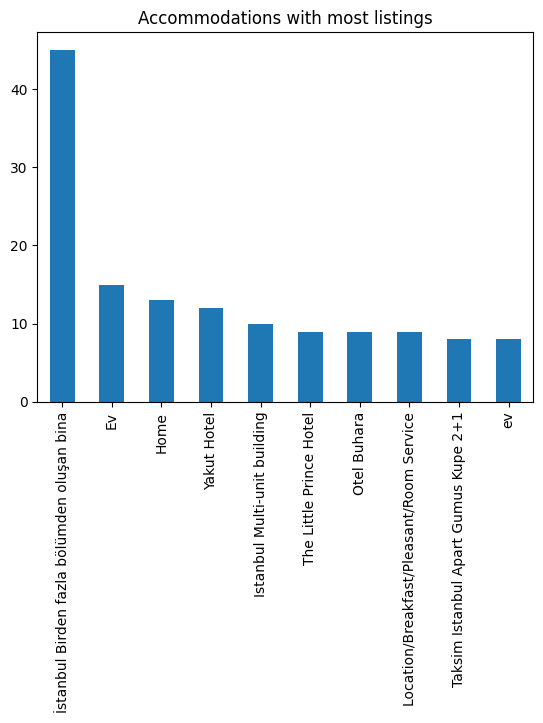

In [18]:
# Accommodations with most listings

chart1 = df["name"].value_counts()
chart1.head(10).plot(kind="bar", title="Accommodations with most listings")

<AxesSubplot: title={'center': 'Neighbourhoods with most accommodations'}>

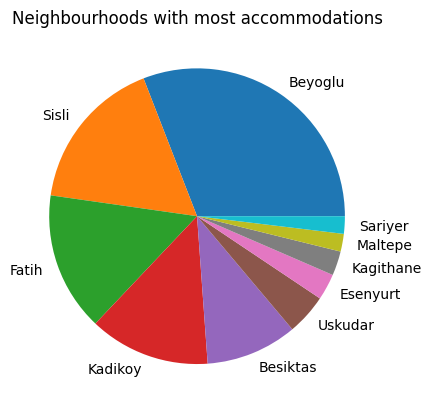

In [19]:
# Neighbourhoods with most accommodations

chart2 = df.groupby(['neighbourhood']).size().sort_values(ascending=False)
chart2.head(10).plot(kind="pie", title="Neighbourhoods with most accommodations")

<AxesSubplot: title={'center': 'Mean Price of Neighbourhoods'}, xlabel='neighbourhood'>

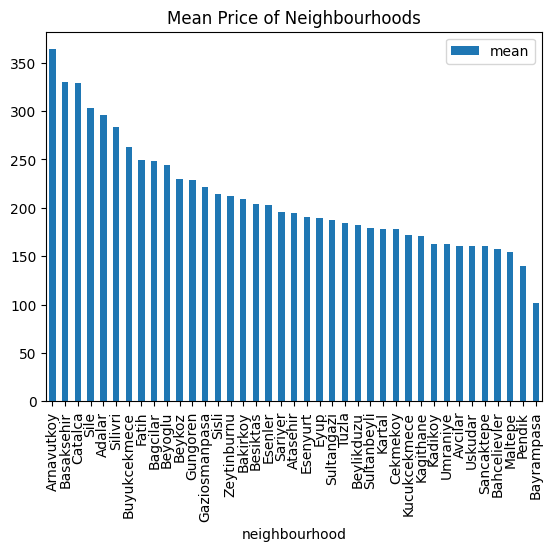

In [20]:
# Average price of neighbourhood

chart3 = df.groupby("neighbourhood")["price"].agg(['mean']).sort_values(by="mean", ascending=False)
chart3.plot(kind="bar", title="Mean Price of Neighbourhoods")

<AxesSubplot: xlabel='host_id,name,room_type'>

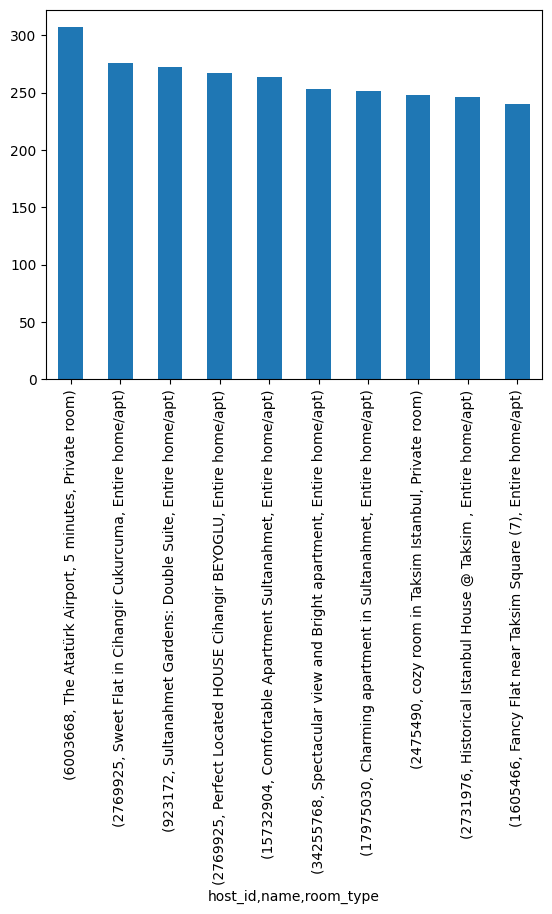

In [21]:
# Busiest hosts (the ones that have the most amount of reviews)

chart4 = df.groupby(['host_id', 'name', 'room_type'])['number_of_reviews'].max().sort_values(ascending=False)
chart4.head(10).plot(kind="bar")

Text(0.5, 1.0, 'Density of Hotels')

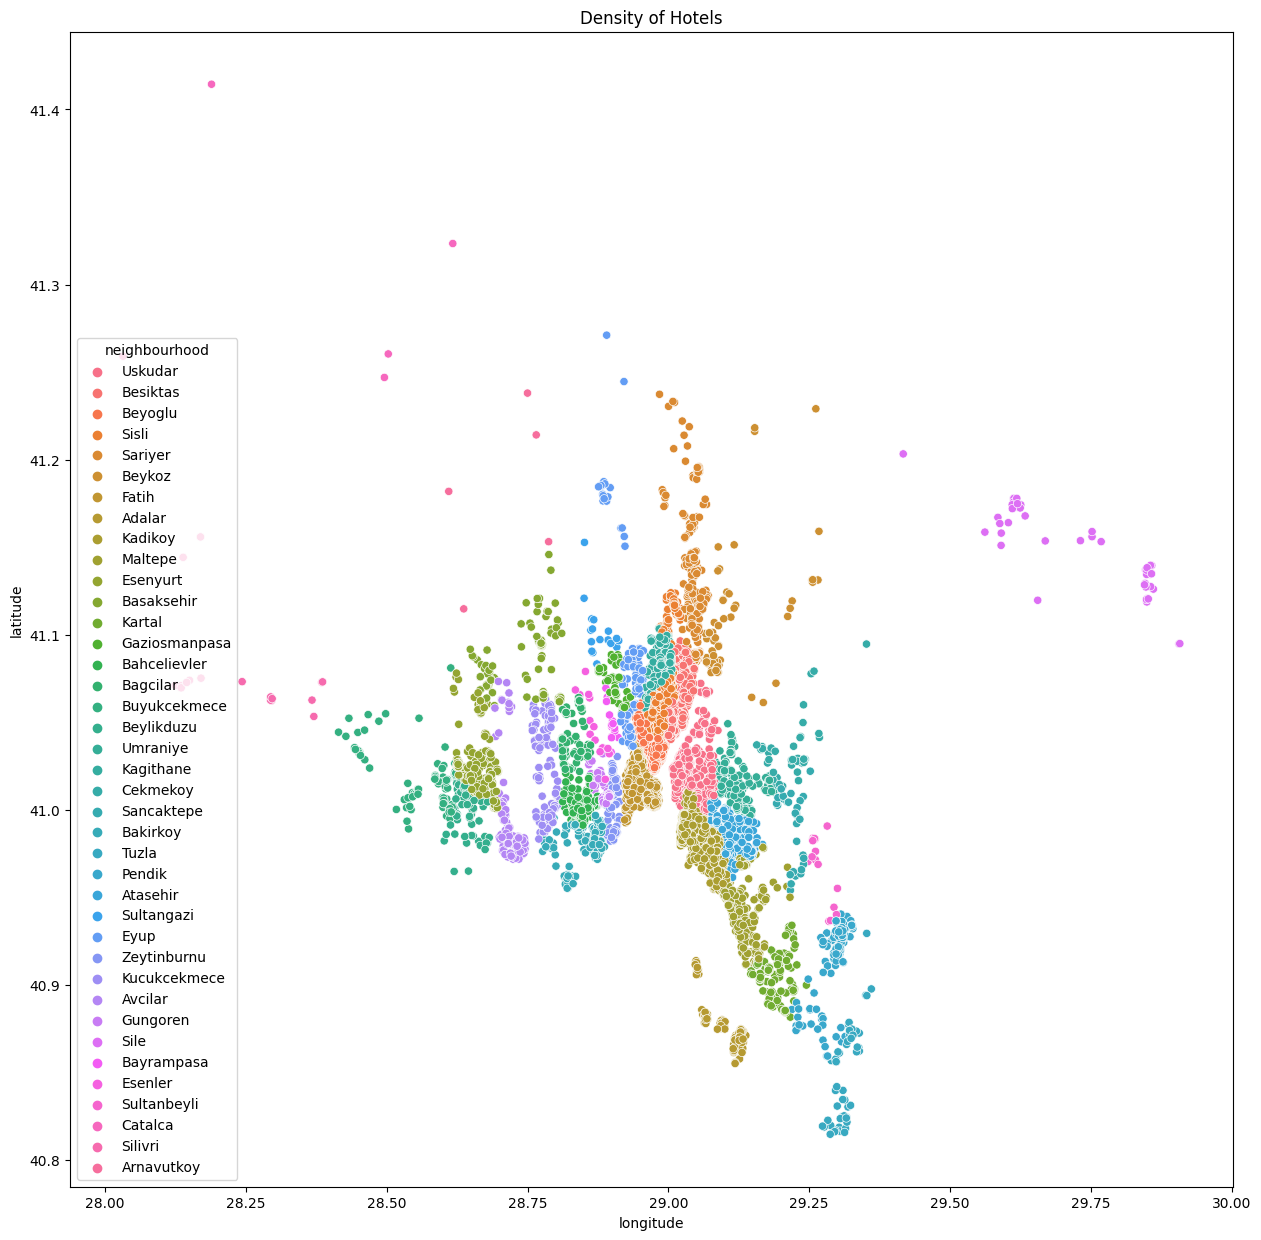

In [22]:
# Plotting the locations of neighbourhoods
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood']).set_title('Density of Hotels')

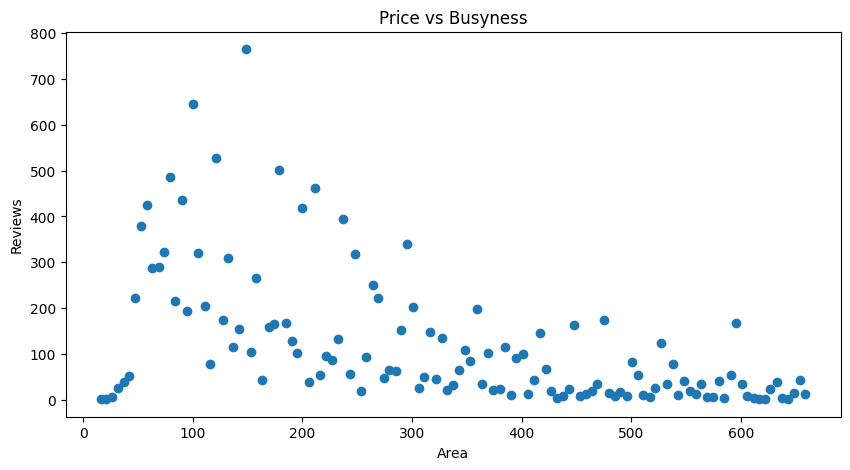

In [23]:
# Comparing price to the busyness

chart5 = df.groupby("price")["number_of_reviews"].count().reset_index()

fig = plt.figure(figsize = (10, 5))
plt.scatter(chart5["price"], chart5["number_of_reviews"])

plt.xlabel("Area")
plt.ylabel("Reviews")
plt.title("Price vs Busyness")
plt.show()

<AxesSubplot: title={'center': 'Mean availability of neighbourhoods'}, xlabel='neighbourhood'>

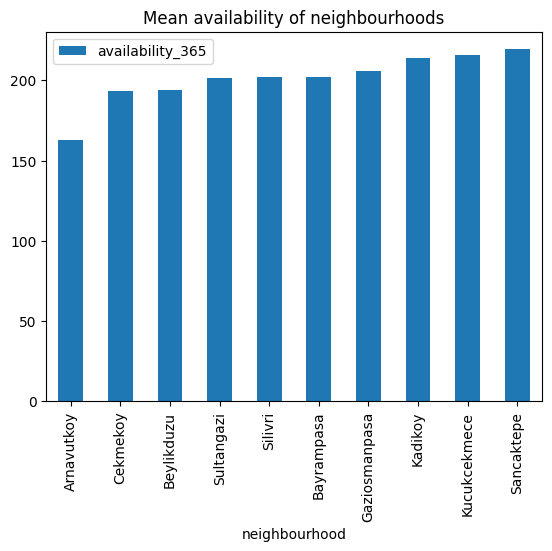

In [24]:
# Calculating the mean availability of neighbourhoods

chart6 = df.groupby("neighbourhood")["availability_365"].mean().sort_values().reset_index()
chart6.head(10).plot(x="neighbourhood", y="availability_365", kind="bar", title="Mean availability of neighbourhoods")

Text(0.5, 1.0, 'Heatmap Showing Correlations of Numbered Attributes')

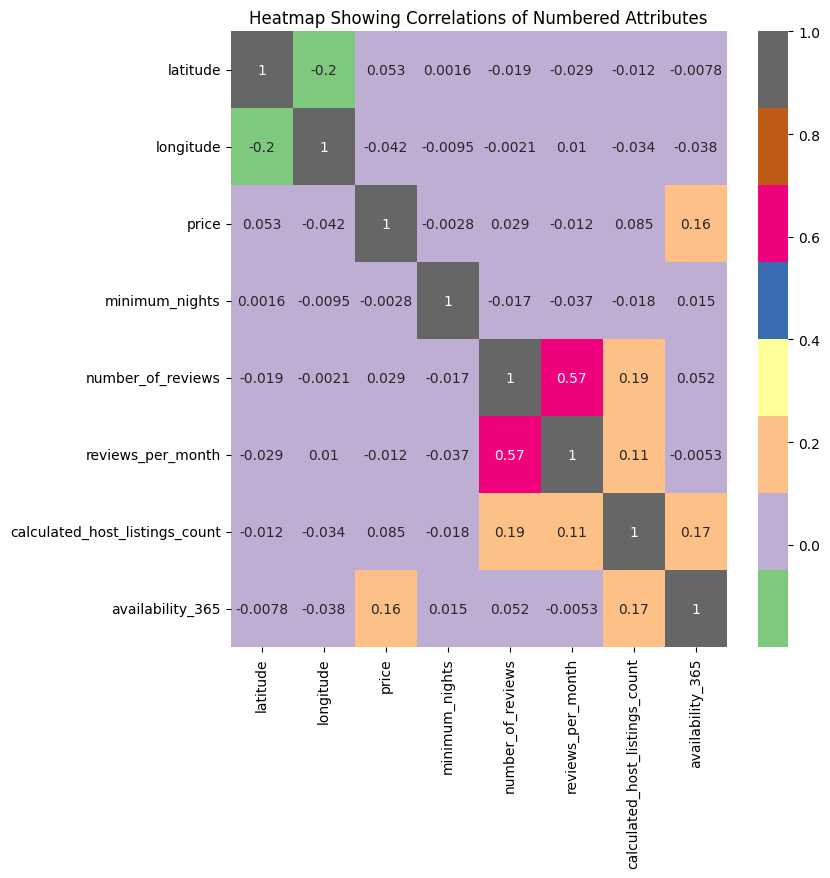

In [25]:
# Plot correlations

df_correlation = df[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

plt.figure(figsize=(8,8))
sns.heatmap(df_correlation.corr(), cmap='Accent', annot=True)
plt.title('Heatmap Showing Correlations of Numbered Attributes')

In [26]:
unique_neighbourhoods = df['neighbourhood'].unique()
unique_roomtypes = df['room_type'].unique()

print(unique_neighbourhoods)
print(unique_roomtypes)

['Uskudar' 'Besiktas' 'Beyoglu' 'Sisli' 'Sariyer' 'Beykoz' 'Fatih'
 'Adalar' 'Kadikoy' 'Maltepe' 'Esenyurt' 'Basaksehir' 'Kartal'
 'Gaziosmanpasa' 'Bahcelievler' 'Bagcilar' 'Buyukcekmece' 'Beylikduzu'
 'Umraniye' 'Kagithane' 'Cekmekoy' 'Sancaktepe' 'Bakirkoy' 'Tuzla'
 'Pendik' 'Atasehir' 'Sultangazi' 'Eyup' 'Zeytinburnu' 'Kucukcekmece'
 'Avcilar' 'Gungoren' 'Sile' 'Bayrampasa' 'Esenler' 'Sultanbeyli'
 'Catalca' 'Silivri' 'Arnavutkoy']
['Entire home/apt' 'Private room' 'Shared room']


In [27]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.499300e+04,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.901259e+07,8.996201e+07,41.025542,28.985371,213.568732,4.549456,7.400787,0.454619,4.006403,246.004669
std,1.051439e+07,8.182576e+07,0.042086,0.112464,142.666673,27.717927,21.668276,0.891948,7.707601,136.636370
min,4.826000e+03,6.603000e+03,40.814690,28.032000,16.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.678147e+06,1.826808e+07,41.004060,28.974090,100.000000,1.000000,0.000000,0.000000,1.000000,90.000000
50%,2.187451e+07,5.352410e+07,41.031120,28.984310,179.000000,1.000000,0.000000,0.000000,1.000000,334.000000
75%,2.874815e+07,1.700660e+08,41.047160,29.023070,290.000000,2.000000,4.000000,0.520000,4.000000,365.000000
max,3.245756e+07,2.437341e+08,41.414420,29.907780,659.000000,1125.000000,307.000000,12.000000,77.000000,365.000000


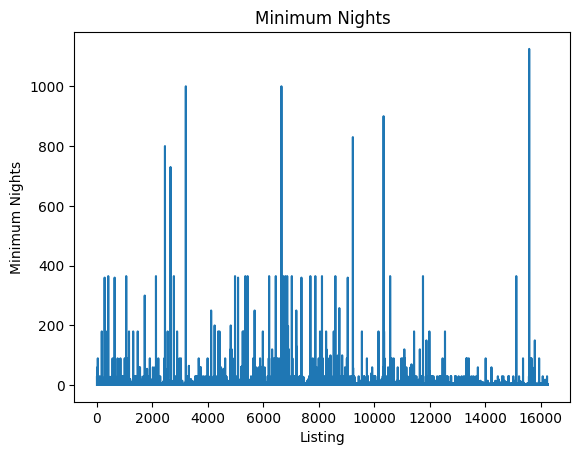

In [28]:
df['minimum_nights'].plot()
plt.title('Minimum Nights')
plt.xlabel('Listing')
plt.ylabel('Minimum Nights')
plt.show()

In [29]:
# Dropping the outliers

df.drop(df.price[df.minimum_nights>365].index,axis=0,inplace=True)

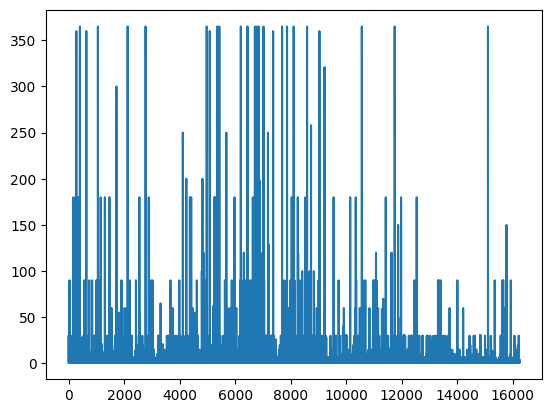

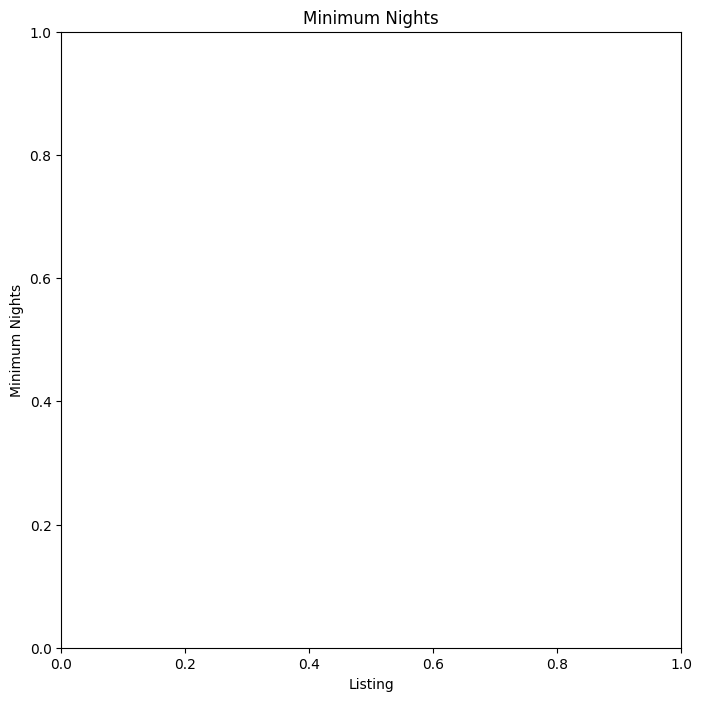

In [30]:
df['minimum_nights'].plot()
plt.figure(figsize=(8,8))
plt.title('Minimum Nights')
plt.xlabel('Listing')
plt.ylabel('Minimum Nights')
plt.show()

In [31]:
# Remove listings which are not available 

df.drop(df.price[df.availability_365 == 0].index,axis=0,inplace=True)

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.347400e+04,1.347400e+04,13474.000000,13474.000000,13474.000000,13474.000000,13474.000000,13474.000000,13474.000000,13474.000000
mean,1.929770e+07,9.123929e+07,41.025331,28.984532,218.699644,4.222651,8.003266,0.492522,4.272599,273.626837
std,1.065889e+07,8.304942e+07,0.041887,0.113067,143.066521,19.931766,22.575849,0.925536,8.031592,114.914804
min,4.826000e+03,6.603000e+03,40.814690,28.032000,21.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.675784e+06,1.792119e+07,41.004170,28.973850,105.000000,1.000000,0.000000,0.000000,1.000000,179.000000
50%,2.263735e+07,5.392904e+07,41.030935,28.983610,179.000000,1.000000,1.000000,0.030000,1.000000,352.000000
75%,2.904726e+07,1.762268e+08,41.046428,29.021280,295.000000,2.000000,5.000000,0.600000,4.000000,365.000000
max,3.245756e+07,2.437341e+08,41.414420,29.907780,659.000000,365.000000,307.000000,12.000000,77.000000,365.000000


In [32]:
# Create normalized price (price per night)

df['price_normalized'] = df['price']/df['minimum_nights']

df.head(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_normalized
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365,554.000000
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49,3.333333
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83,10.047619
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228,47.400000
4,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356,197.000000
5,28308,Great apartment in Cihangir...,121695,Mustafa,Beyoglu,41.03105,28.98297,Entire home/apt,237,1,0,0.00,1,365,237.000000
6,28318,Cosy home overlooking Bosphorus,121721,Aydin,Sariyer,41.09048,29.05559,Entire home/apt,633,3,0,0.00,1,365,211.000000
7,29241,"↪ Istanbul, Your second house",125742,Şevki,Beyoglu,41.04844,28.95254,Private room,264,3,0,0.00,1,365,88.000000
8,30697,nice home in popular area,132137,Nan,Beyoglu,41.03350,28.97626,Private room,596,1,1,0.01,1,365,596.000000
9,33368,Deluxe double bedroom @ Nisantasi,135136,Ozlem,Sisli,41.05382,28.99739,Private room,295,2,1,0.02,2,232,147.500000


In [33]:
# Clustering

In [34]:
# Extract the columns that contain the information we need for clustering

x = df[["availability_365", "price_normalized"]]
xa = df.iloc[:, [13, 14]].values

In [35]:
# Silhouette scores and sum of squared errors

k_values = range(2, 10)
kmeans_sse = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x)
    kmeans_sse.append(kmeans.inertia_)

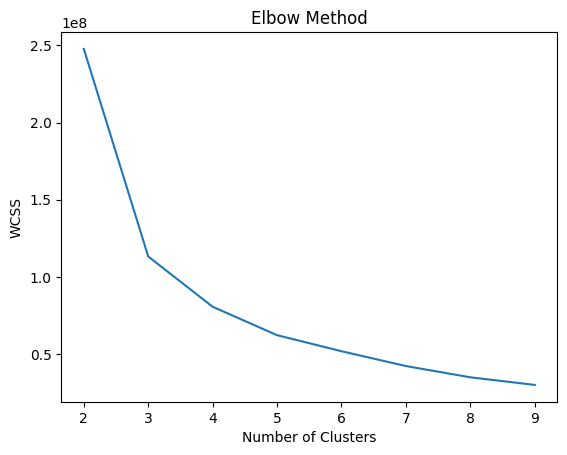

In [36]:
plt.plot(k_values, kmeans_sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Create a K-Means clustering model with the 
# number of clusters set to 4 based on the elbow method

kmeans = KMeans(n_clusters=3, n_init=10)
agglomeration = AgglomerativeClustering(n_clusters=4)

In [38]:
# Fit the K-Means model to the data

kmeans.fit(x)

KMeans(n_clusters=3, n_init=10)

In [39]:
# Predict cluster labels for each listing in the dataset.

kmeans_clusters = kmeans.predict(x)
agglomeration_clusters = agglomeration.fit_predict(xa)

In [40]:
# Add cluster number to the original dataset to the each record

df['kmeans_cluster'] = kmeans_clusters
df['agglomeration_cluster'] = agglomeration_clusters

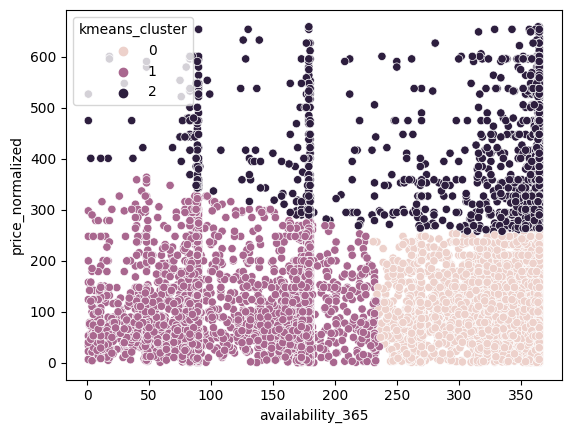

In [41]:
# Scatter plot for K Means

sns.scatterplot(x="availability_365", y="price_normalized", hue="kmeans_cluster", data=df)

# show the plot
plt.show()

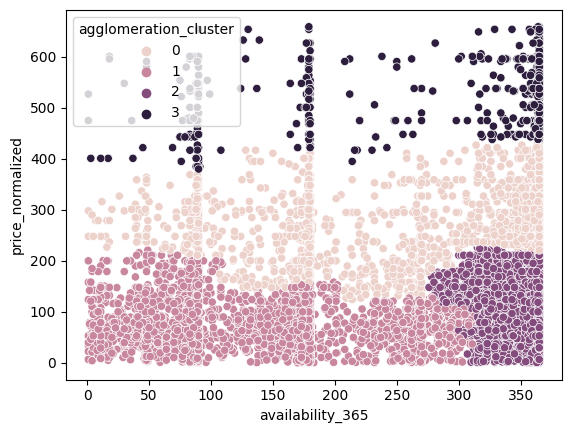

In [42]:
# Scatter plot for Agglomeration

sns.scatterplot(x="availability_365", y="price_normalized", hue="agglomeration_cluster", data=df)

# show the plot
plt.show()

In [43]:
data = df[["availability_365", "price_normalized"]]
agglomeration_labels = df['agglomeration_cluster']
kmeans_labels = df['kmeans_cluster']

agglomeration_score = silhouette_score(data, agglomeration_labels, metric='euclidean')
kmeans_score = silhouette_score(data, kmeans_labels, metric='euclidean')

print('Agglomeration silhouetter Score: %.3f' % agglomeration_score)
print('K-Means silhouetter Score: %.3f' % kmeans_score)

Agglomeration silhouetter Score: 0.484
K-Means silhouetter Score: 0.552


In [44]:
# Use groupby method to group the listings by their cluster label
# then use the mean method to calculate the average availability for each cluster.

avg_availability_by_cluster = df.groupby('kmeans_cluster')['availability_365'].mean()

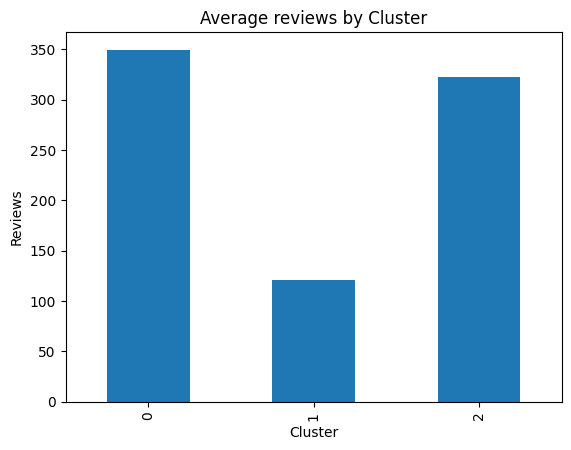

In [45]:
# Create a bar plot

avg_availability_by_cluster.plot(kind='bar')
plt.title('Average reviews by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Reviews')
plt.show()

In [46]:
# filter the data to include only listings in the "Besiktas" neighborhood
filtered_neighbourhood = df[df["neighbourhood"] == "Besiktas"]

# find the cluster with the lowest average price
lowest_price_cluster = df.groupby("kmeans_cluster")["price_normalized"].mean().sort_values().index[0]

# filter the data to include only listings in the "Arnavutkoy" neighborhood that are in the cluster with the lowest average price
lowest_price_properties = filtered_neighbourhood[filtered_neighbourhood["kmeans_cluster"] == lowest_price_cluster]

# display the first few rows of the resulting dataframe
lowest_price_properties.head(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_normalized,kmeans_cluster,agglomeration_cluster
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49,3.333333,1,1
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83,10.047619,1,1
253,591954,Cosy Double Room with Huge Terrace!,2541656,Başak,Besiktas,41.05087,29.00637,Private room,79,4,34,0.43,11,202,19.750000,1,1
269,609217,Luxury house with a private garden,3019226,Pürün,Besiktas,41.04683,29.00243,Entire home/apt,316,1,103,1.30,1,79,316.000000,1,0
314,670454,"Cozy Room with Terrace, City View!",2541656,Başak,Besiktas,41.05164,29.00582,Private room,74,4,15,0.19,11,232,18.500000,1,1
325,690554,"clean, convenient Apt",2999718,Resul,Besiktas,41.04837,29.02634,Entire home/apt,95,1,14,0.19,7,235,95.000000,1,1
428,790189,Bosphorus viewBebek aptwith Garden,3500242,Wish,Besiktas,41.06994,29.04473,Entire home/apt,654,5,20,0.27,1,87,130.800000,1,1
432,796583,"Cozy Home & Office, Istanbul",4196378,Kerem,Besiktas,41.08054,29.04483,Entire home/apt,353,1,0,0.00,1,48,353.000000,1,0
516,891181,Beautiful Double Room in Besiktas,2541656,Başak,Besiktas,41.05073,29.00474,Private room,79,4,22,0.31,11,233,19.750000,1,1
573,961596,PEACEFUL&CUTE room,3546900,Ulas,Besiktas,41.04680,29.00436,Private room,90,3,18,0.30,1,90,30.000000,1,1
